# altimetry/gdp collocalisation

In [36]:
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeo

from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings("ignore")

In [2]:
if False:
    from dask.distributed import Client
    from dask_jobqueue import PBSCluster
    cluster = PBSCluster(processes=4, cores=4)
    w = cluster.scale(jobs=5)
    client = Client(cluster)
    client
else:
    from dask.distributed import Client, LocalCluster
    #
    cluster = LocalCluster()
    client = Client(cluster)
    client

---
## load data

In [5]:
nc = '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/mdb/2016/20161201_SASSA-L3-SLA-Sentinel-3_A__argos.nc'

ds = xr.open_dataset(nc).persist()
ds
print('Dataset size = %.1f GB' %(ds.nbytes/1e9))

Dataset size = 1.0 GB


In [53]:
ds.time.max().values, ds.time.min().values

(numpy.datetime64('2016-12-31T23:00:00.000000000'),
 numpy.datetime64('2016-11-30T22:00:00.000000000'))

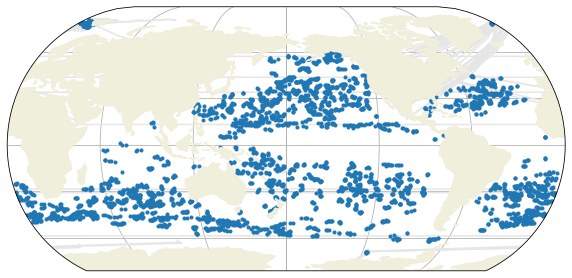

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=ccrs.EckertIII(central_longitude=-180))

land_feature = cfeature.LAND
ax.add_feature(land_feature, zorder=2)

#for o in ds.obs:
#    _ds = ds.sel(obs=o)
#    ax.plot(_ds.sassa_lon, _ds.sassa_lat, color="0.9", transform=ccrs.PlateCarree())

ax.plot(ds.lon, ds.lat, ".", transform=ccrs.PlateCarree())

gl = ax.gridlines()

## Count occurences in bins

(array([1.447e+04, 4.970e+02, 3.850e+02, 2.240e+02, 1.590e+02, 7.300e+01,
        4.600e+01, 2.600e+01, 1.300e+01, 1.700e+01, 8.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <BarContainer object of 19 artists>)

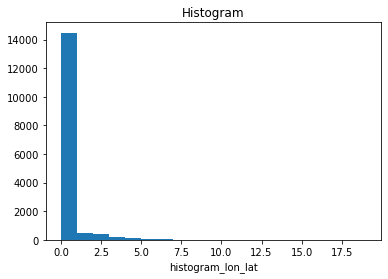

In [62]:
dl = 2
lon, lat = np.arange(-180, 180, dl), np.arange(-90,90,dl)

count = histogram(ds.lon, ds.lat, bins=[lon, lat], bin_dim_suffix='')
count.plot.hist(bins=np.arange(0,20))

(array([  0., 497., 385., 224., 159.,  73.,  46.,  26.,  13.,  17.,   8.,
          3.,   0.,   1.,   1.,   2.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <BarContainer object of 19 artists>)

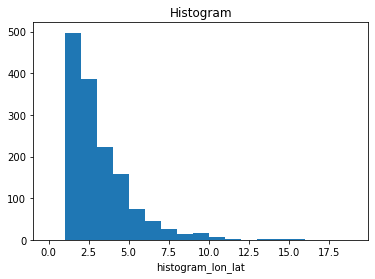

In [63]:
count = count.where(count>0)
count.plot.hist(bins=np.arange(0,20))

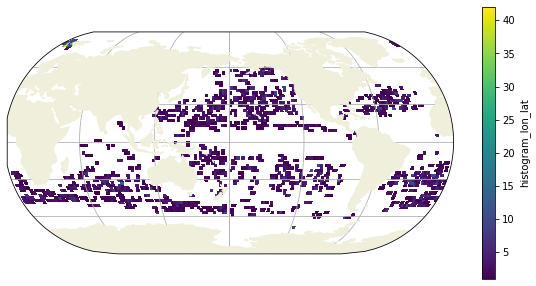

In [46]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=ccrs.EckertIII(central_longitude=-180))

land_feature = cfeature.LAND
ax.add_feature(land_feature, zorder=2)

count.plot(x="lon", y="lat", ax=ax, transform=ccrs.PlateCarree())

#ax.plot(ds.lon, ds.lat, ".", transform=ccrs.PlateCarree())

gl = ax.gridlines()

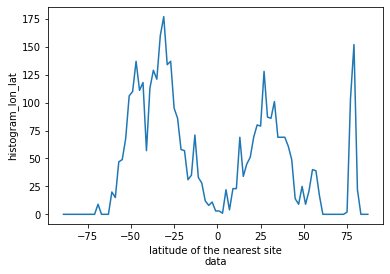

In [48]:
count.sum("lon").plot()